In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
data = pd.read_csv('data.xlsx - Sheet1.csv')

In [4]:
print("Data Head:")
display(data.head())

Data Head:


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (3998, 39)


In [6]:
print("Data Description:")
display(data.describe())

Data Description:


,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [7]:
numerical_cols = data.select_dtypes(include=np.number).columns

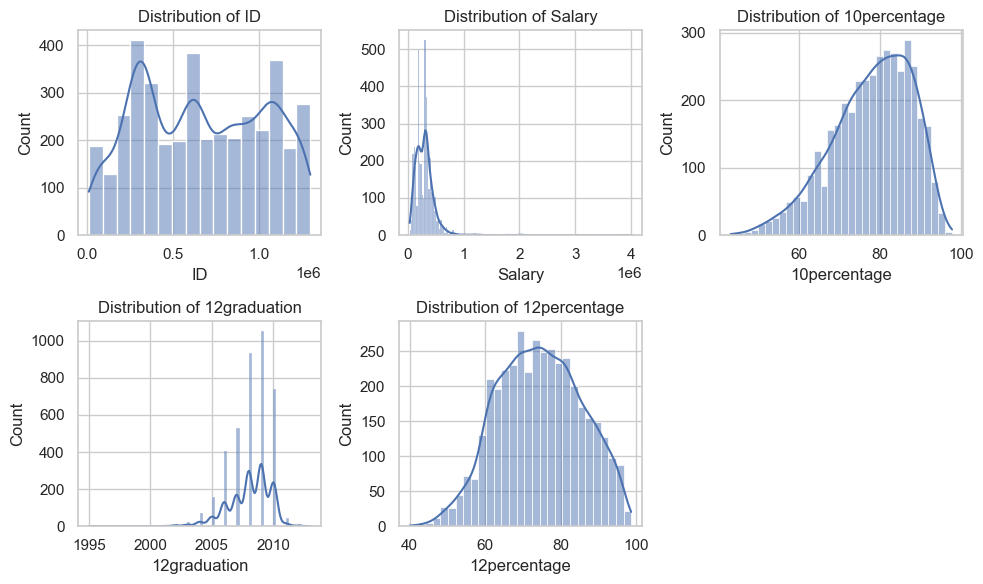

In [8]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols[:5], 1):  # Limiting to 5 plots
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

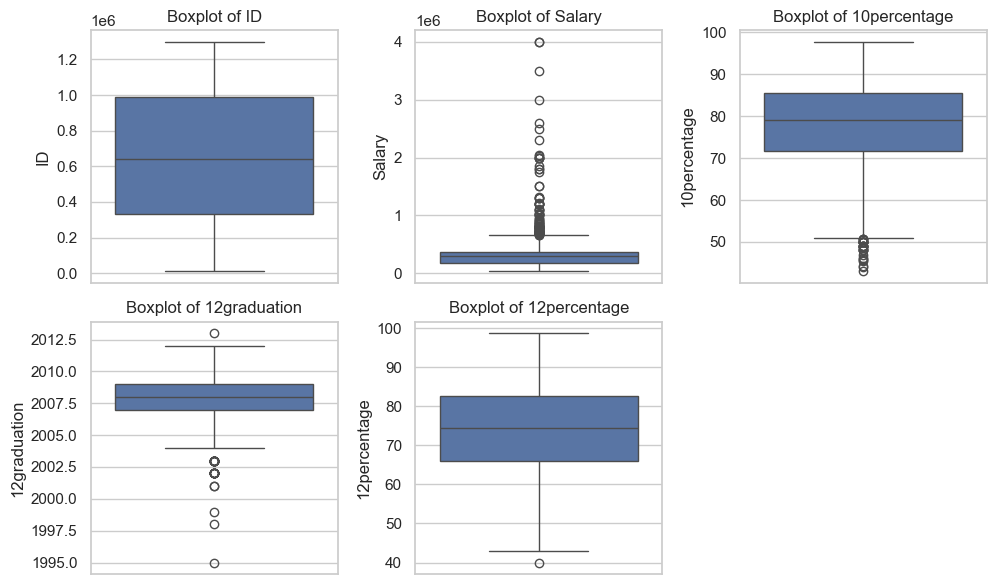

In [9]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols[:5], 1):  # Limiting to 5 plots
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [10]:
categorical_cols = data.select_dtypes(exclude=np.number).columns

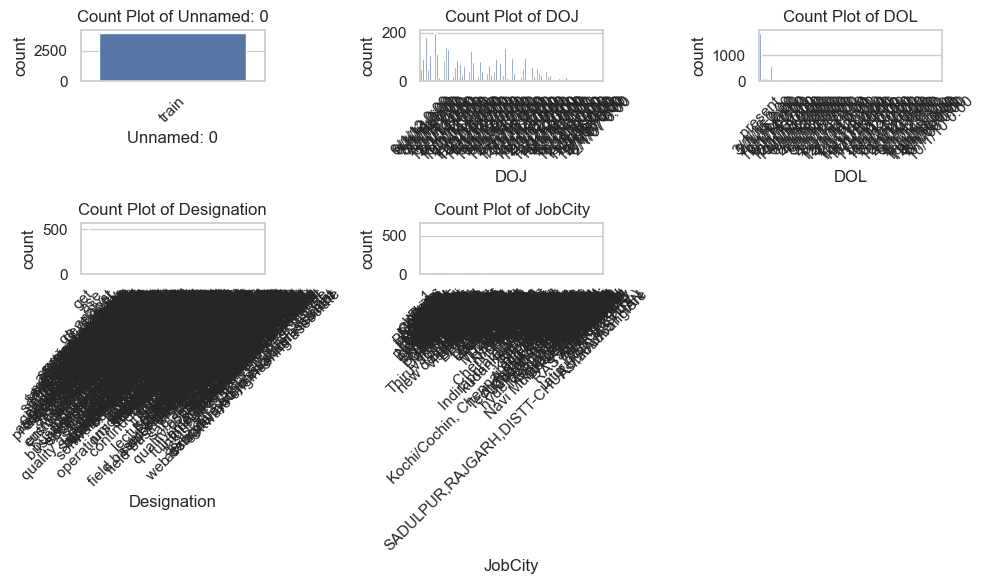

In [11]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_cols[:5], 1):  # Limiting to 5 plots
    plt.subplot(2, 3, i)
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

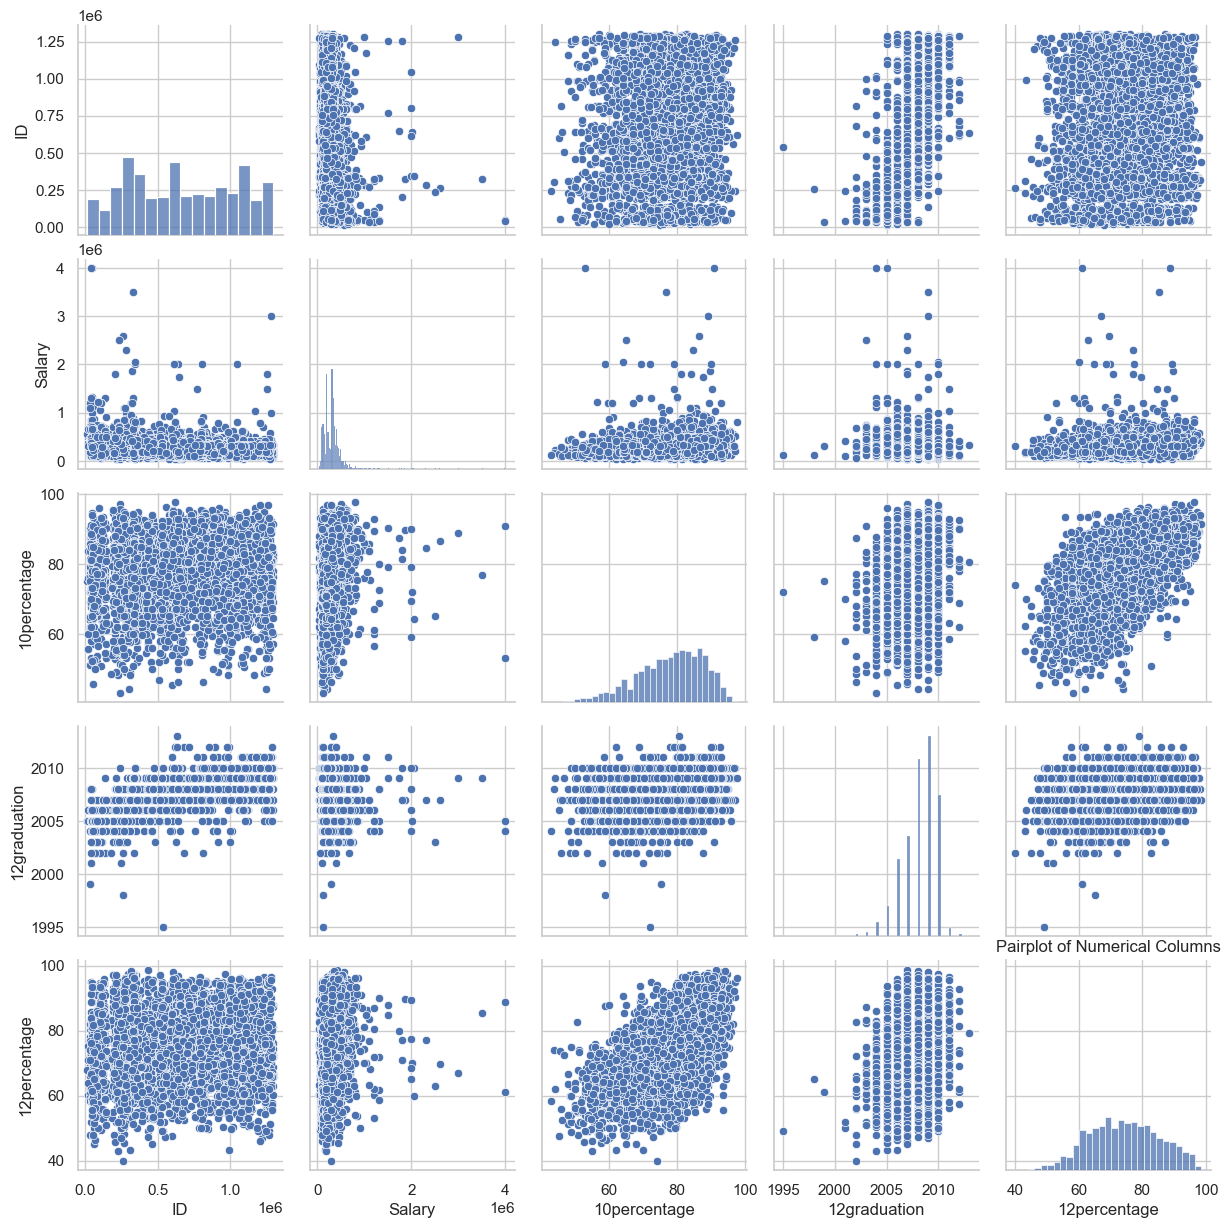

In [12]:
sns.pairplot(data[numerical_cols[:5]])
plt.title('Pairplot of Numerical Columns')
plt.show()

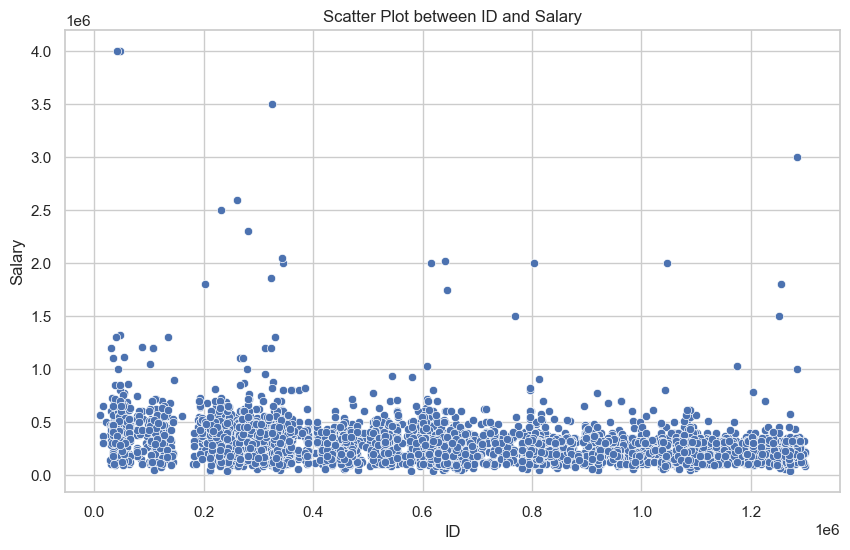

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[numerical_cols[0]], y=data[numerical_cols[1]])
plt.title(f'Scatter Plot between {numerical_cols[0]} and {numerical_cols[1]}')
plt.show()

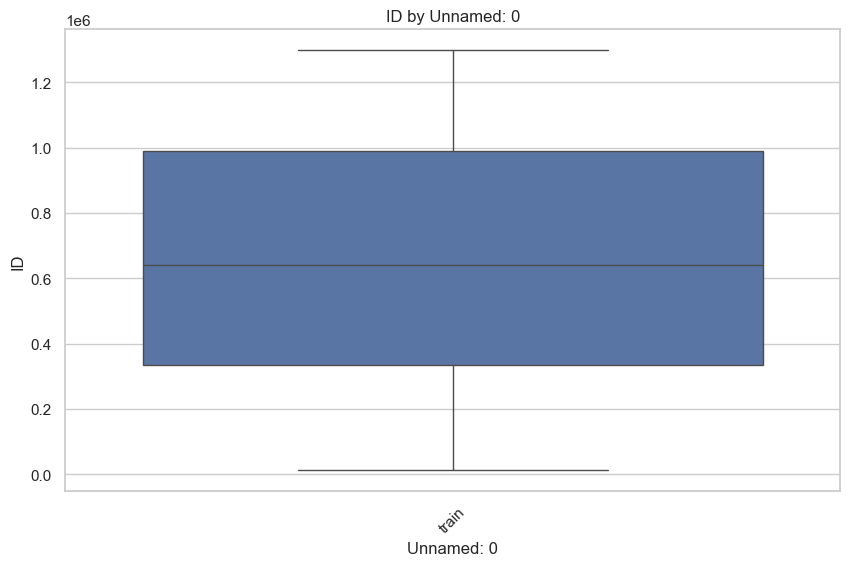

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[categorical_cols[0]], y=data[numerical_cols[0]])
plt.title(f'{numerical_cols[0]} by {categorical_cols[0]}')
plt.xticks(rotation=45)
plt.show()

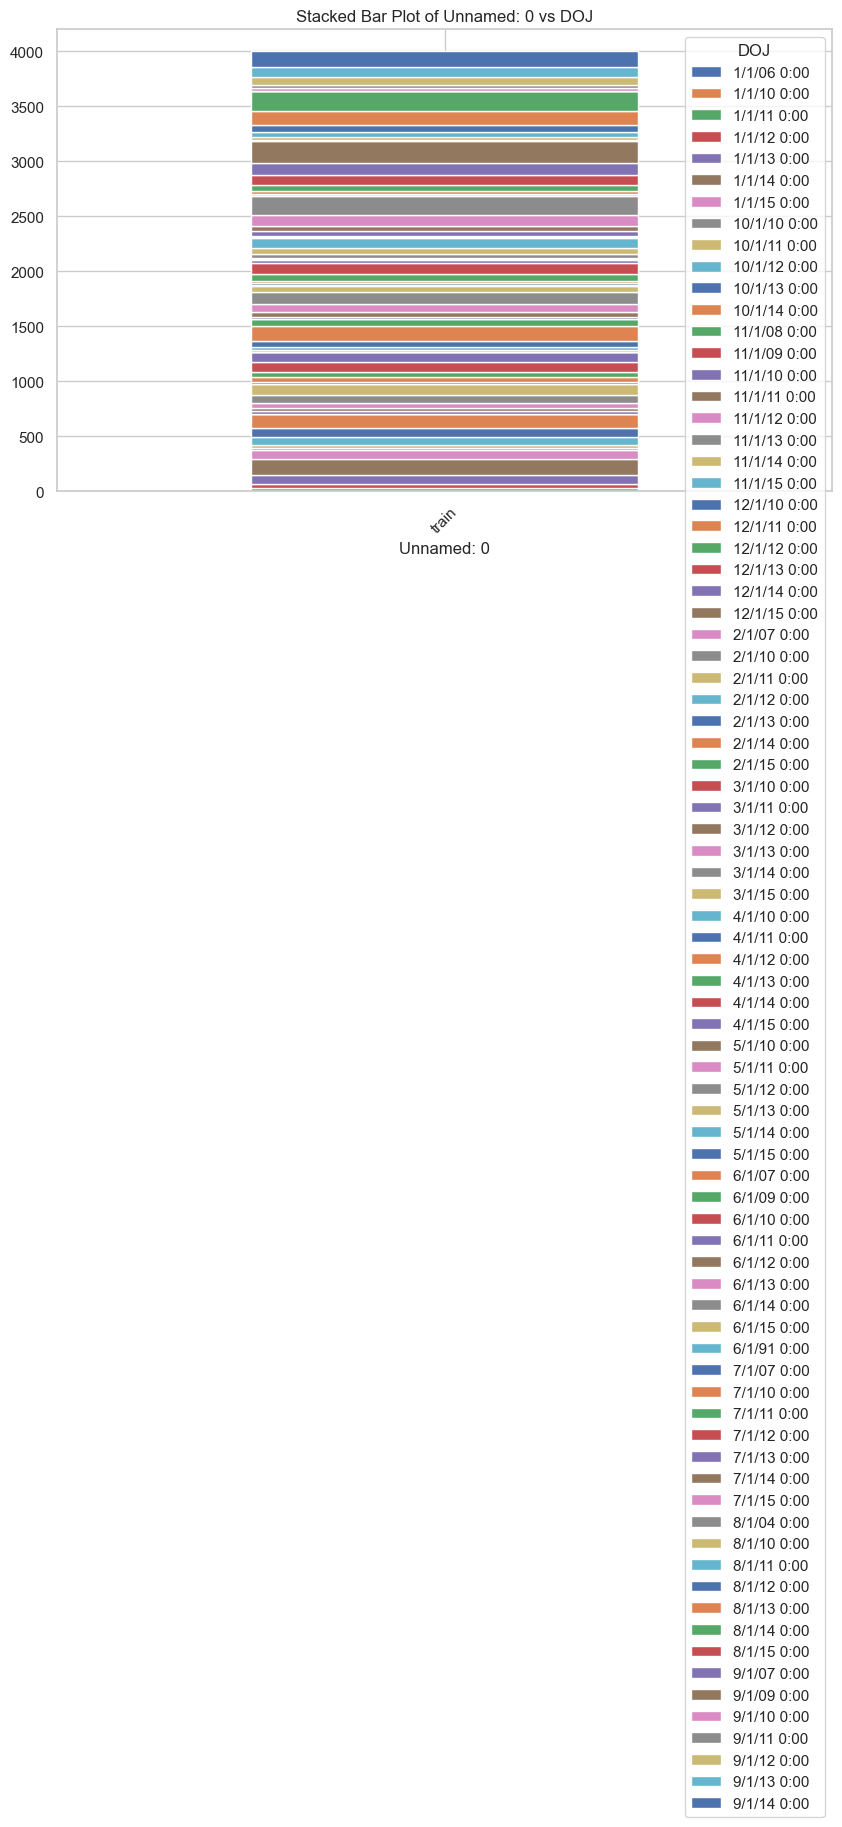

In [15]:
cross_tab = pd.crosstab(data[categorical_cols[0]], data[categorical_cols[1]])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'Stacked Bar Plot of {categorical_cols[0]} vs {categorical_cols[1]}')
plt.xticks(rotation=45)
plt.show()

In [19]:
job_titles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']
filtered_data = data[data['Designation'].isin(job_titles)]

In [20]:
print(f"Mean Salary for selected job titles: {filtered_data['Salary'].mean()}")
print(f"Median Salary for selected job titles: {filtered_data['Salary'].median()}")

Mean Salary for selected job titles: 339792.0433996383
Median Salary for selected job titles: 320000.0


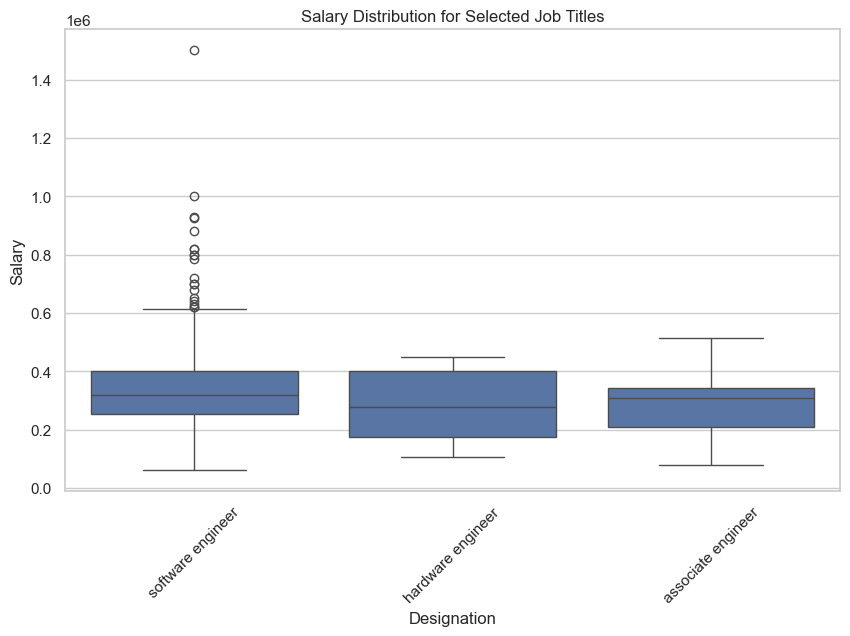

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Designation', y='Salary', data=filtered_data)
plt.title('Salary Distribution for Selected Job Titles')
plt.xticks(rotation=45)
plt.show()

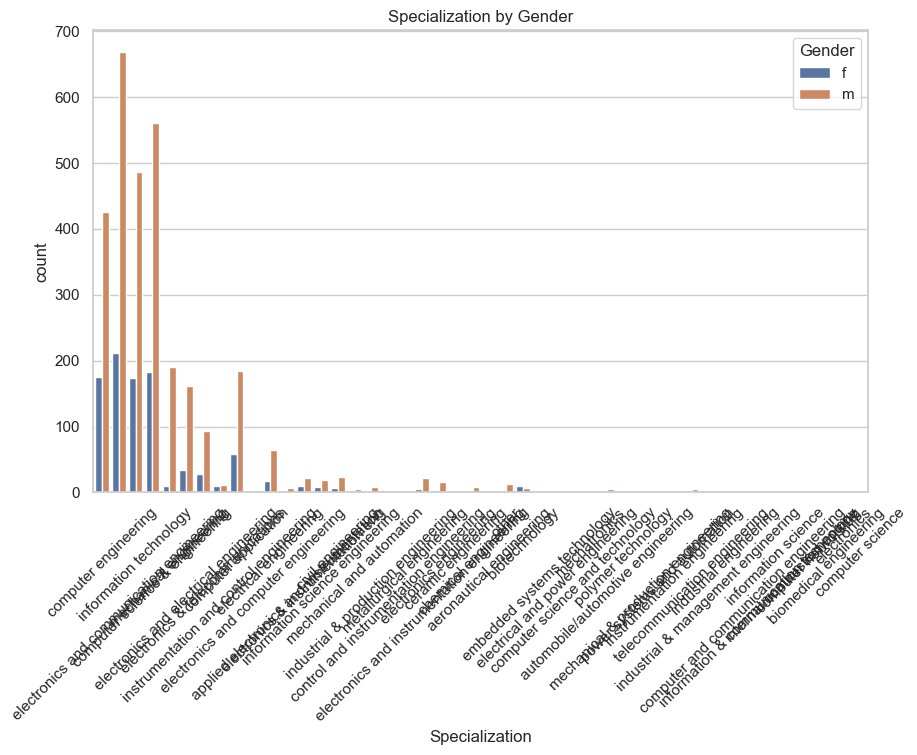

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Specialization', hue='Gender', data=data)
plt.title('Specialization by Gender')
plt.xticks(rotation=45)
plt.show()